## Datetime as X-axis Indices in Matplotlib Plots

Python datetime are converted to floating numbers which represent Gregorian days.  This has effect on plotting data as date histogram type plots whose x-axis is datetime especially if it's for hourly interval. 

For examlple,
```python
  >>> import matplotlib.dates as mpl_dates
  >>> from datetime import datetime, timedelta
  >>> d1 = mpl_dates.date2num( datetime(2017,2,1, 1,0,0))
  >>> d2 = mpl_dates.date2num( datetime(2017,2,2, 1,0,0))
  >>> d3 = mpl_dates.date2num( datetime(2017,2,2, 2,0,0))
  >>> dd = d2 - d1   # daily interval
  >>> dh = d3 - d2   # hourly interval
  >>> print(dd)
  1.0
  >>> print(dh)
  0.0416666667443
```

As in the above example, for hourly interval, the interval between neighboring x-positions is 0.04 (= 1/24), which is larger than the default width of 0.8, and the bars will be overlapped if no *_width_* is provided.
```python
  >>> data = np.arange(34,10,-1)
  >>> dates = mpl_dates.drange(datetime(2017,2,1,1,0,0), datetime(2017,2,2,1,0,0), timedelta(hours=1))
```

In [2]:
%matplotlib inline

from datetime import datetime, timedelta

import numpy as np
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

In [3]:

d1 = mpl_dates.date2num( datetime(2017,2,1, 1,0,0))
d2 = mpl_dates.date2num( datetime(2017,2,2, 1,0,0))
d3 = mpl_dates.date2num( datetime(2017,2,2, 2,0,0))
dd = d2 - d1   # daily interval
dh = d3 - d2   # hourly interval
print(dd)
print(dh)

1.0
0.04166666674427688


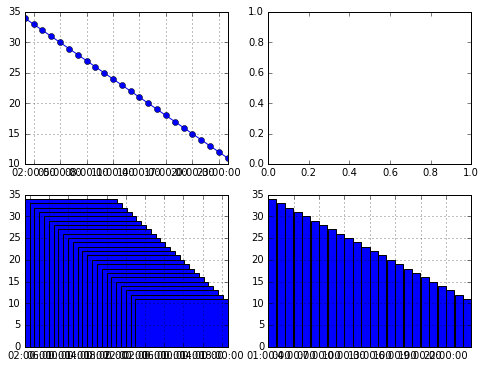

In [18]:
data = np.arange(34,10,-1)
#-- drange() : returns dates as Gregorian days in floating point values
#dates = mpl_dates.drange(datetime(2017,2,1,1,0,0), datetime(2017,2,2,1,0,0), timedelta(hours=1))
#-- rrule() : returns dates as datetime objects
dates = list(mpl_dates.rrule(mpl_dates.HOURLY, 
                             dtstart=datetime(2017,2,1,1,0,0), count=len(data)))

#fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,3))
fig, ((ax1, _), (ax2, ax3)) = plt.subplots(2,2, figsize=(8,6))

l1 = ax1.plot(dates,data, '-o')
ax1.grid(1)

b2 = ax2.bar(dates,data)
ax2.grid(1)

b3 = ax3.bar(dates,data, width=0.04)
ax3.grid(1)


In [ ]:
#dir(b2[0])

In [45]:
print(b2[0].get_x(), b2[0].get_width())

736361.0416666666 0.8


In [41]:
print(b3[0].get_x(), b3[0].get_width())

736361.0416666666 0.04
